In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/MinhTrong92/Final-Test/main/Analyze%20Transaction%20Data/transaction_data.csv')

In [3]:
df

,txn_time,txn_date,order_id,uid,shop_id,shop_owner_uid,gmv,rebate
0,10/30/2019 13:37,10/30/2019,142008725,102161515,1005,100054430,70000,20000
1,10/30/2019 20:26,10/30/2019,142119377,102867263,10050,1792841,80000,20000
2,10/30/2019 12:22,10/30/2019,141986418,100401383,10075,100155720,125000,20000
3,10/30/2019 9:46,10/30/2019,141941958,103213155,10088,103894677,82000,20000
4,10/30/2019 21:56,10/30/2019,142139275,101003290,10142,103909421,260000,20000
...,...,...,...,...,...,...,...,...
4606,11/2/2019 18:22,11/2/2019,142816720,103022399,9949,101915150,450000,20000
4607,11/2/2019 14:09,11/2/2019,142755559,100344658,9957,103201893,80000,20000
4608,11/2/2019 9:54,11/2/2019,142695503,103907242,9967,1892155,250000,20000
4609,11/2/2019 20:48,11/2/2019,142847286,104102998,9967,1892155,1030000,20000


In [4]:
df['txn_date'] = pd.to_datetime(df['txn_date'])

df['txn_time'] = pd.to_datetime(df['txn_time'])

In [5]:
df['order_id'] = df['order_id'].astype(str)
df['uid'] = df['uid'].astype(str)
df['shop_id'] = df['shop_id'].astype(str)
df['shop_owner_uid'] = df['shop_owner_uid'].astype(str)

In [6]:
df.dtypes

txn_time          datetime64[ns]
txn_date          datetime64[ns]
order_id                  object
uid                       object
shop_id                   object
shop_owner_uid            object
gmv                        int64
rebate                     int64
dtype: object

In [7]:
df.isnull().sum()

txn_time          0
txn_date          0
order_id          0
uid               0
shop_id           0
shop_owner_uid    0
gmv               0
rebate            0
dtype: int64

In [8]:
df.describe(include="all")

C:\Users\MINHTR~1\AppData\Local\Temp/ipykernel_11216/1985922364.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,txn_time,txn_date,order_id,uid,shop_id,shop_owner_uid,gmv,rebate
count,4611,4611,4611,4611,4611,4611,4.611000e+03,4611.000000
unique,2521,4,4611,3093,1385,1277,NaN,NaN
top,2019-11-02 13:05:00,2019-11-02 00:00:00,142008725,100205391,10979,102817559,NaN,NaN
freq,8,1529,1,26,256,256,NaN,NaN
first,2019-10-30 00:00:00,2019-10-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-11-02 23:58:00,2019-11-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.389853e+05,16813.508350
std,NaN,NaN,NaN,NaN,NaN,NaN,1.939904e+05,6520.511497
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.000000e+04,19500.000000


# Khoảng tổng hóa đơn bao nhiêu thì có số lượng giao dịch nhiều nhất

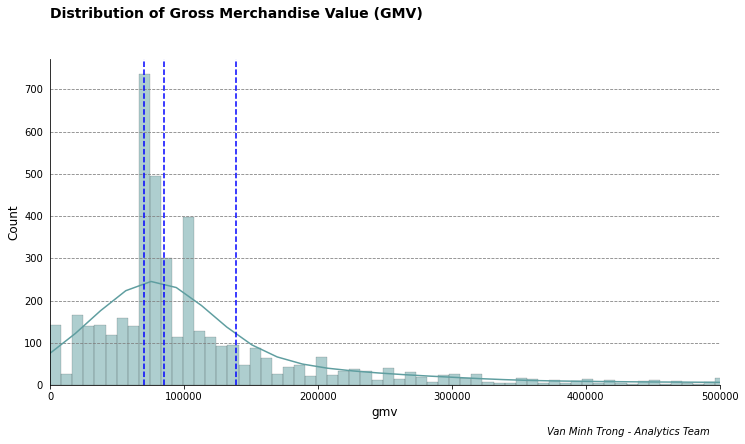

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))

ax=sns.histplot(data=df, x=df.gmv, kde=True, color='#5f9ea0')
ax.axvline(np.percentile(df.gmv, 25), color="blue", linestyle="--")
ax.axvline(np.percentile(df.gmv, 50), color="blue", linestyle="--")
ax.axvline(np.percentile(df.gmv, 75), color="blue", linestyle="--")
plt.xlim(0, 500000)

ax.yaxis.grid(color='gray', linestyle='dashed')
# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False) 

# thêm title, label các trục và source:
plt.suptitle('Distribution of Gross Merchandise Value (GMV)', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
#plt.title('2nd title', style='italic', size=12, loc='left')
plt.xlabel('gmv', size=12)
plt.ylabel('Count', size=12)
plt.text(0.7, 0.01, "Van Minh Trong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

In [10]:
print("Hóa đơn có số lượng giao dịch nhiều nhất là những hóa đơn có giá trị vào khoảng:" ,np.percentile(df.gmv, 25),"đây là khoảng tiền giao dịch để nhận được mức khuyến mãi tối đa")
print("50% số lượng giao dịch cho những hóa đơn giá trị nằm trong khoảng",np.percentile(df.gmv, 25),"đến",np.percentile(df.gmv, 75))

Hóa đơn có số lượng giao dịch nhiều nhất là những hóa đơn có giá trị vào khoảng: 70000.0 đây là khoảng tiền giao dịch để nhận được mức khuyến mãi tối đa
50% số lượng giao dịch cho những hóa đơn giá trị nằm trong khoảng 70000.0 đến 139000.0


### gmv tổng hợp theo ngày

In [11]:
summary = df.groupby(["txn_date"]).\
                            agg(total_gmv = ('gmv','sum'),total_transaction = ('gmv','size'), average_gmv = ('gmv','mean')).\
                            reset_index()

In [12]:
from datetime import datetime

summary['date']=''

for i in range(len(summary['txn_date'])):
    summary['date'][i] = summary.txn_date[i].strftime("%d/%m/%Y")

C:\Users\MINHTR~1\AppData\Local\Temp/ipykernel_11216/462859331.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary['date'][i] = summary.txn_date[i].strftime("%d/%m/%Y")


In [13]:
summary

,txn_date,total_gmv,total_transaction,average_gmv,date
0,2019-10-30,131357099,936,140338.780983,30/10/2019
1,2019-10-31,158087327,1086,145568.441068,31/10/2019
2,2019-11-01,129886834,1060,122534.749057,01/11/2019
3,2019-11-02,221529847,1529,144885.446043,02/11/2019


 + Số lượng lượt giao dịch và khối lượng giao dịch cao nhất ở ngày 11/02/2019
 + Bình quân trong 4 ngày, khối lượng giao dịch đồng đều nhau, không có ngày quá vượt trội

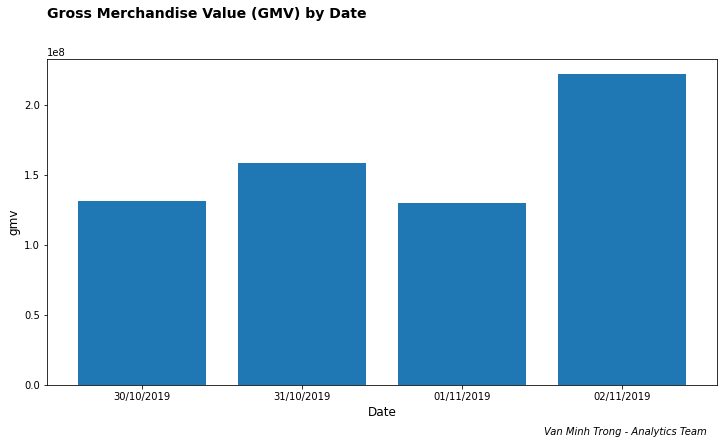

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(summary.date,summary.total_gmv,)


# thêm title, label các trục và source:
plt.suptitle('Gross Merchandise Value (GMV) by Date', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Date', size=12)
plt.ylabel('gmv', size=12)
plt.text(0.7, 0.01, "Van Minh Trong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

### Những uid có khối lượng giao dịch lớn trong 4 ngày qua

In [15]:
uid_summarize  = df.groupby(["txn_date","uid"]).\
                            agg(total_gmv = ('gmv','sum'))

In [16]:
uid_summarize['rank'] = uid_summarize.groupby(['txn_date'])['total_gmv'].rank(ascending=False)

In [17]:
uid_summarize.sort_values(['txn_date','rank'], ascending=True, inplace=True)
#a.sort_values('rank', ascending=True, inplace=True, ignore_index=True)

+ **Top 5 những uid có khối lượng giao dịch lớn trong 4 ngày khuyến mãi**

In [18]:
uid_summarize[uid_summarize['rank'] < 6]

total_gmv  rank
txn_date   uid                       
2019-10-30 1775175      3750000   1.0
           100760866    2550000   2.0
           104049030    2160000   3.0
           1615169      1814000   4.0
           103821692    1380000   5.0
2019-10-31 1964134      2650000   1.0
           102514760    2640000   2.0
           103962250    2000000   3.0
           101752957    1920000   4.0
           103224502    1724000   5.0
2019-11-01 100248645    3659000   1.0
           100485825    1205000   2.0
           103384495    1080000   3.0
           100954369    1050000   4.0
           1941083       916000   5.0
2019-11-02 101296780    1827000   1.0
           101887517    1796000   2.0
           101967276    1440000   3.0
           101455376    1395000   4.0
           102045748    1368000   5.0

### Những shop_owner_uid có khối lượng giao dịch trung bình lớn trong 4 ngày qua

In [19]:
shop_owner_uid_summarize  = df.groupby(["txn_date","shop_owner_uid"]).\
                            agg(total_gmv = ('gmv','mean'))

In [20]:
shop_owner_uid_summarize['rank'] = shop_owner_uid_summarize.groupby(['txn_date'])['total_gmv'].rank(ascending=False)

In [21]:
shop_owner_uid_summarize.sort_values(['txn_date','rank'], ascending=True, inplace=True)

+ **Top 5 những shop_owner_uid có khối lượng giao dịch trung bình lớn trong 4 ngày khuyến mãi**

In [22]:
shop_owner_uid_summarize[shop_owner_uid_summarize['rank'] < 6]

total_gmv  rank
txn_date   shop_owner_uid                 
2019-10-30 103546989       2550000.0   1.0
           100890595       2160000.0   2.0
           100488451       1643250.0   3.0
           103000118       1380000.0   4.0
           100907530        900000.0   5.0
2019-10-31 1794222         2650000.0   1.0
           103971125       2640000.0   2.0
           103684153       1920000.0   3.0
           104028708       1235000.0   4.0
           103714113       1120000.0   5.0
2019-11-01 103282856       1981500.0   1.0
           1813124         1205000.0   2.0
           1005623          898200.0   3.0
           103324753        850000.0   4.0
           101984664        843843.0   5.0
2019-11-02 103325914       1827000.0   1.0
           103310013       1796000.0   2.0
           101704763       1395000.0   3.0
           102890502       1368000.0   4.0
           2025407         1240000.0   5.0

# Đâu là 3 người bán có khả năng lạm dụng chương trình này và giải thích

Người bán có khả năng lạm dụng chương trình là những người thực hiện giao dịch mà k chiết khấu, hoặc chiết khấu mức nhỏ hơn so với quy định của chương trình

In [23]:
shop = df.groupby(["shop_owner_uid"]).agg(total_shops = ('shop_id','nunique')).reset_index()

In [24]:
shop.sort_values('total_shops', ascending=False, inplace=True, ignore_index=True)

+ **Số lượng shop mà một shop_owner_uid sở hữu**

In [25]:
shop

,shop_owner_uid,total_shops
0,1010911,8
1,1006513,7
2,1009512,6
3,1005623,5
4,1005510,5
...,...,...
1272,102368516,1
1273,102366571,1
1274,102365024,1
1275,102338881,1


In [26]:
df['rebate_correct']=''

for i in range(len(df['gmv'])):
    if df['gmv'][i]*0.3>20000:
        df['rebate_correct'][i] = 20000
    else:
        df['rebate_correct'][i] = int(round(df['gmv'][i]*0.3,0))

C:\Users\MINHTR~1\AppData\Local\Temp/ipykernel_11216/3926984544.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rebate_correct'][i] = 20000
C:\Users\MINHTR~1\AppData\Local\Temp/ipykernel_11216/3926984544.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rebate_correct'][i] = int(round(df['gmv'][i]*0.3,0))


In [27]:
df['check']=''

for i in range(len(df['rebate_correct'])):
    if df['rebate_correct'][i] == df['rebate'][i]:
        df['check'][i] = "Correct"
    else:
        df['check'][i] = "Incorrect"

C:\Users\MINHTR~1\AppData\Local\Temp/ipykernel_11216/3461034101.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check'][i] = "Correct"
C:\Users\MINHTR~1\AppData\Local\Temp/ipykernel_11216/3461034101.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['check'][i] = "Incorrect"


In [28]:
data = df[df['check']=="Incorrect"]

In [29]:
data

,txn_time,txn_date,order_id,uid,shop_id,shop_owner_uid,gmv,rebate,rebate_correct,check
22,2019-10-30 17:34:00,2019-10-30,142079537,103040497,1023,100910348,145000,0,20000,Incorrect
28,2019-10-30 20:12:00,2019-10-30,142116105,100644529,10231,103895518,20000,0,6000,Incorrect
33,2019-10-30 21:24:00,2019-10-30,142132777,101574266,10283,100675839,70000,0,20000,Incorrect
52,2019-10-30 10:50:00,2019-10-30,141956702,102547028,10564,102615537,68,0,20,Incorrect
53,2019-10-30 11:01:00,2019-10-30,141959539,102547028,10564,102615537,68,0,20,Incorrect
...,...,...,...,...,...,...,...,...,...,...
4457,2019-11-02 09:04:00,2019-11-02,142686812,100356519,9006,103587193,48000,0,14400,Incorrect
4460,2019-11-02 13:09:00,2019-11-02,142743128,100717535,9006,103587193,55000,0,16500,Incorrect
4465,2019-11-02 18:08:00,2019-11-02,142813572,100741185,9019,103189670,25000,0,7500,Incorrect
4480,2019-11-02 22:48:00,2019-11-02,142865169,100380012,9128,100307126,35000,0,10500,Incorrect


In [30]:
data_sumary = data.groupby(["shop_owner_uid"]).agg(No_Incorrect = ('check','size'), total_rebate_corect = ('rebate_correct','sum')).reset_index()

In [31]:
data_sumary.sort_values('total_rebate_corect', ascending=False, inplace=True, ignore_index=True)

In [32]:
data_sumary.head(3)

,shop_owner_uid,No_Incorrect,total_rebate_corect
0,102817559,84,516000
1,103980077,7,140000
2,100178254,6,111500


**Kết Luận:** 3 người bán có khả năng đang lạm dụng chương trình khuyến mãi là:
 + shop_owner_uid 102817559 với 84 lần không chiết khấu khuyến mãi cho khách hàng, tổng số tiền là 516000
 + shop_owner_uid 103980077 với 7 lần không chiết khấu khuyến mãi cho khách hàng, tổng số tiền là 140000
 + shop_owner_uid 100178254 với 6 lần không chiết khấu khuyến mãi cho khách hàng, tổng số tiền là 111500

# Đâu là 3 người mua có khả năng lạm dụng chương trình này và giải thích 

- **Tìm 3 người mua có khả năng lạm dụng chương trình dựa trên số lần giao dịch nhiều hơn so với khách hàng khác trong 4 ngày khuyến mãi**

In [33]:
cus = df.groupby(["uid"]).agg(no_transactions = ('order_id','count')).reset_index()

In [34]:
cus.sort_values('no_transactions', ascending=False, inplace=True, ignore_index=True)

In [35]:
cus.head(3)

,uid,no_transactions
0,100205391,26
1,100605978,23
2,1026737,16


**Kết luận:** 3 người mua có khả năng đang lạm dụng chương trình khuyến mãi là
 + uid 100205391
 + uid 100605978	
 + uid 1026737	

- **Tìm 3 người mua có khả năng lạm dụng chương trình dựa vào hành vi thực hiện các giao dịch nhỏ liên tiếp trong 4 ngày khuyến mãi để tối ưu khoản tiền khuyến mãi có thể nhận được**

In [36]:
df['gmv<66666']=''
for i in range(len(df['gmv'])):
    if df['gmv'][i] <= 66666:
        df['gmv<66666'][i] = "Yes"
    else:
        df['gmv<66666'][i] = "No"

C:\Users\MINHTR~1\AppData\Local\Temp/ipykernel_11216/1515247682.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gmv<66666'][i] = "No"
C:\Users\MINHTR~1\AppData\Local\Temp/ipykernel_11216/1515247682.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gmv<66666'][i] = "Yes"


In [37]:
trans = df[df['gmv<66666']=="Yes"]

In [38]:
trans

,txn_time,txn_date,order_id,uid,shop_id,shop_owner_uid,gmv,rebate,rebate_correct,check,gmv<66666
5,2019-10-30 10:31:00,2019-10-30,141951971,100614916,10163,103915242,1,0,0,Correct,Yes
6,2019-10-30 12:46:00,2019-10-30,141993339,100060089,10173,103915476,56000,16800,16800,Correct,Yes
16,2019-10-30 21:02:00,2019-10-30,142128057,100111849,10229,103906831,35000,10500,10500,Correct,Yes
26,2019-10-30 19:06:00,2019-10-30,142098790,100774429,10231,103895518,45000,13500,13500,Correct,Yes
27,2019-10-30 20:00:00,2019-10-30,142112688,100644529,10231,103895518,50000,15000,15000,Correct,Yes
...,...,...,...,...,...,...,...,...,...,...,...
4594,2019-11-02 17:12:00,2019-11-02,142802409,100190450,9883,103296978,65000,19500,19500,Correct,Yes
4601,2019-11-02 20:48:00,2019-11-02,142847205,102269504,9909,100530690,25000,7500,7500,Correct,Yes
4602,2019-11-02 22:21:00,2019-11-02,142862221,102746514,9909,100530690,60000,18000,18000,Correct,Yes
4603,2019-11-02 21:03:00,2019-11-02,142850117,100887506,9922,103895112,26000,7800,7800,Correct,Yes


In [39]:
trans_sum = trans.groupby(["uid"]).agg(no_transactions = ('gmv<66666','size')).reset_index()

In [40]:
trans_sum.sort_values('no_transactions', ascending=False, inplace=True, ignore_index=True)

In [41]:
trans_sum.head(3)

,uid,no_transactions
0,100205391,25
1,100605978,19
2,1026737,15


**Kết luận:** 3 người mua có khả năng đang lạm dụng chương trình khuyến mãi là
 + uid 100205391
 + uid 100605978	
 + uid 1026737	